# ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥ EDA

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ÏÑ§ÏπòÎêú Ìè∞Ìä∏ Î™©Î°ùÏùÑ Í∞±Ïã†ÌïòÍ≥†, 'NanumGothic' Ìè∞Ìä∏Î•º Í∏∞Î≥∏ Ìè∞Ìä∏Î°ú ÏÑ§Ï†ïÌï©ÎãàÎã§.
font_path = 'C:/Windows/Fonts/NanumGothic.ttf' 
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

import sys
sys.path.append('../utils')

In [2]:
from sklearn.pipeline import Pipeline
from sklearn import set_config
from preprocessing import (
    DateElapsedTransformer, NumericFeaturePreprocessor, ObjectFeaturePreprocessor, NumericTypeOptimizer,
)

pre_optimizer = NumericTypeOptimizer(mode='pre')
date_transformer = DateElapsedTransformer()
numeric_transformer = NumericFeaturePreprocessor()
object_transformer = ObjectFeaturePreprocessor()
post_optimizer = NumericTypeOptimizer(mode='post')

preprocessing_pipeline = Pipeline([
    ('pre_optimizer', pre_optimizer),
    ('object', object_transformer),
    ('date', date_transformer),
    ('numeric', numeric_transformer),
    ('post_optimizer', post_optimizer),
])

# Set display configuration to visualize the pipeline
set_config(display='diagram')

# Display the pipeline
preprocessing_pipeline

Pipeline(steps=[('pre_optimizer', NumericTypeOptimizer(mode='pre')),
                ('object',
                 ObjectFeaturePreprocessor(exclude_columns=['ID', 'Segment'])),
                ('date',
                 DateElapsedTransformer(base_date=Timestamp('2019-01-01 00:00:00'),
                                        exclude_columns=['ID', 'Segment',
                                                         'Í∏∞Ï§ÄÎÖÑÏõî'])),
                ('numeric',
                 NumericFeaturePreprocessor(exclude_columns=['Í∏∞Ï§ÄÎÖÑÏõî'])),
                ('post_optimizer', NumericTypeOptimizer())])

In [3]:
from sklearn.preprocessing import LabelEncoder
from data_loader import load_data

tx_df, tx_test_df = load_data("3.ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥")

X = tx_df.drop(columns=['ID', 'Í∏∞Ï§ÄÎÖÑÏõî'])
X = preprocessing_pipeline.fit_transform(X)
X.info()

‚úÖ File: ../../dataset/train/3.ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥\201807_train_ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥.parquet Completed!
‚úÖ File: ../../dataset/train/3.ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥\201808_train_ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥.parquet Completed!
‚úÖ File: ../../dataset/train/3.ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥\201809_train_ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥.parquet Completed!
‚úÖ File: ../../dataset/train/3.ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥\201810_train_ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥.parquet Completed!
‚úÖ File: ../../dataset/train/3.ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥\201811_train_ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥.parquet Completed!
‚úÖ File: ../../dataset/train/3.ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥\201812_train_ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥.parquet Completed!
üîπ Shape : (2400000, 406)

‚úÖ File: ../../dataset/test/3.ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥\201807_test_ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥.parquet Completed!
‚úÖ File: ../../dataset/test/3.ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥\201808_test_ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥.parquet Completed!
‚úÖ File: ../../dataset/test/3.ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥\201809_test_ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥.parquet Completed!
‚úÖ File: ../../dataset/test/3.ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥\201810_te

In [4]:
import numpy as np

def optimize_numeric_types(df, verbose=True):
    """
    DataFrameÏùò ÏàòÏπòÌòï(int, float) Ïª¨ÎüºÏùÑ Ïà´Ïûê Î≤îÏúÑÏóê ÎßûÏ∂∞ Îã§Ïö¥Ï∫êÏä§ÌåÖÌïòÏó¨ Î©îÎ™®Î¶¨Î•º ÏµúÏ†ÅÌôî
    
    Parameters:
    - df (pd.DataFrame): ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    - verbose (bool): ÏµúÏ†ÅÌôî Ï†ÑÌõÑ Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ Ï∂úÎ†• Ïó¨Î∂Ä

    Returns:
    - pd.DataFrame: ÏµúÏ†ÅÌôîÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    """
    start_mem = df.memory_usage(deep=True).sum() / 1024**2 # MBÎã®ÏúÑÎ°ú Î≥ÄÌôò
    
    for col in df.select_dtypes(include=['int', 'float']).columns:
        col_type = df[col].dtypes
        
        if np.issubdtype(col_type, np.integer):
            c_min = df[col].min()
            c_max = df[col].max()
            
            if c_min >= 0:
                if c_max < np.iinfo(np.uint8).max:
                    df[col] = df[col].astype(np.uint8)
                elif c_max < np.iinfo(np.uint16).max:
                    df[col] = df[col].astype(np.uint16)
                elif c_max < np.iinfo(np.uint32).max:
                    df[col] = df[col].astype(np.uint32)
                else:
                    df[col] = df[col].astype(np.uint64)
            else:
                if np.iinfo(np.int8).min <= c_min and c_max <= np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif np.iinfo(np.int16).min <= c_min and c_max <= np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif np.iinfo(np.int32).min <= c_min and c_max <= np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                else:
                    df[col] = df[col].astype(np.int64)
                    
        elif np.issubdtype(col_type, np.floating):
            c_min = df[col].min()
            c_max = df[col].max()
            
            if np.finfo(np.float16).min <= c_min and c_max <= np.finfo(np.float16).max:
                df[col] = df[col].astype(np.float16)
            elif np.finfo(np.float32).min <= c_min and c_max <= np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
            else:
                df[col] = df[col].astype(np.float64)
    
    end_mem = df.memory_usage(deep=True).sum() / 1024**2
    
    if verbose:
        print(f"üîπ Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ: {start_mem:.2f} MB ‚Üí {end_mem:.2f} MB  ({100*(start_mem-end_mem)/start_mem:.1f}% Í∞êÏÜå)")
    
    return df

In [5]:
tx_df = optimize_numeric_types(tx_df)
tx_test_df = optimize_numeric_types(tx_test_df)

üîπ Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ: 9165.26 MB ‚Üí 3628.61 MB  (60.4% Í∞êÏÜå)
üîπ Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ: 2288.73 MB ‚Üí 900.56 MB  (60.7% Í∞êÏÜå)


In [ ]:
tx_df.to_parquet('../dataset/train/3.ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥_ÏµúÏ†ÅÌôî.parquet', index=False, engine='fastparquet')
tx_test_df.to_parquet('../dataset/test/3.ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥_ÏµúÏ†ÅÌôî.parquet', index=False, engine='fastparquet')

# tx_df = pd.read_parquet('../dataset/train/3.ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥_ÏµúÏ†ÅÌôî.parquet', engine='fastparquet')
# tx_test_df = pd.read_parquet('../dataset/test/3.ÏäπÏù∏Îß§Ï∂úÏ†ïÎ≥¥_ÏµúÏ†ÅÌôî.parquet', engine='fastparquet')

In [51]:
object_columns = tx_df.select_dtypes(include=['object']).columns
object_columns

Index(['ID', '_1ÏàúÏúÑÏóÖÏ¢Ö', '_2ÏàúÏúÑÏóÖÏ¢Ö', '_3ÏàúÏúÑÏóÖÏ¢Ö', '_1ÏàúÏúÑÏáºÌïëÏóÖÏ¢Ö', '_2ÏàúÏúÑÏáºÌïëÏóÖÏ¢Ö', '_3ÏàúÏúÑÏáºÌïëÏóÖÏ¢Ö',
       '_1ÏàúÏúÑÍµêÌÜµÏóÖÏ¢Ö', '_2ÏàúÏúÑÍµêÌÜµÏóÖÏ¢Ö', '_3ÏàúÏúÑÍµêÌÜµÏóÖÏ¢Ö', '_1ÏàúÏúÑÏó¨Ïú†ÏóÖÏ¢Ö', '_2ÏàúÏúÑÏó¨Ïú†ÏóÖÏ¢Ö', '_3ÏàúÏúÑÏó¨Ïú†ÏóÖÏ¢Ö',
       '_1ÏàúÏúÑÎÇ©Î∂ÄÏóÖÏ¢Ö', '_2ÏàúÏúÑÎÇ©Î∂ÄÏóÖÏ¢Ö', '_3ÏàúÏúÑÎÇ©Î∂ÄÏóÖÏ¢Ö', 'ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_Ïã†Ï≤≠Í≤ΩÎ°úÏΩîÎìú', 'Ïù¥Ïö©Í∏àÏï°ÎåÄ'],
      dtype='object')

In [52]:
unique_values = {col: tx_df[col].unique() for col in object_columns if col != 'ID'}
unique_values

{'_1ÏàúÏúÑÏóÖÏ¢Ö': array(['ÎÇ©Î∂Ä', 'ÏáºÌïë', None, 'ÏÇ¨ÍµêÌôúÎèô', 'ÍµêÏú°', 'ÍµêÌÜµ', 'Ìï¥Ïô∏', 'ÏùòÎ£å', 'Ïó¨Ïú†ÏÉùÌôú', 'ÏùºÏÉÅÏÉùÌôú',
        'ÏöîÏãù'], dtype=object),
 '_2ÏàúÏúÑÏóÖÏ¢Ö': array(['ÏáºÌïë', 'ÎÇ©Î∂Ä', 'ÏÇ¨ÍµêÌôúÎèô', None, 'ÍµêÌÜµ', 'Ìï¥Ïô∏', 'ÏùòÎ£å', 'ÍµêÏú°', 'Ïó¨Ïú†ÏÉùÌôú', 'ÏùºÏÉÅÏÉùÌôú',
        'ÏöîÏãù'], dtype=object),
 '_3ÏàúÏúÑÏóÖÏ¢Ö': array(['ÏÇ¨ÍµêÌôúÎèô', 'ÍµêÌÜµ', None, 'ÎÇ©Î∂Ä', 'ÏáºÌïë', 'Ïó¨Ïú†ÏÉùÌôú', 'ÏùòÎ£å', 'Ìï¥Ïô∏', 'ÏùºÏÉÅÏÉùÌôú', 'ÍµêÏú°',
        'ÏöîÏãù'], dtype=object),
 '_1ÏàúÏúÑÏáºÌïëÏóÖÏ¢Ö': array(['ÏáºÌïëÍ∏∞ÌÉÄ', 'ÎèÑÏÜåÎß§', 'Ïò®ÎùºÏù∏', 'ÎßàÌä∏', None, 'ÏäàÌçºÎßàÏºì', 'Ìé∏ÏùòÏ†ê', 'Î∞±ÌôîÏ†ê', 'ÏïÑÏö∏Î†õ'],
       dtype=object),
 '_2ÏàúÏúÑÏáºÌïëÏóÖÏ¢Ö': array([None, 'ÏäàÌçºÎßàÏºì', 'ÎèÑÏÜåÎß§', 'Ìé∏ÏùòÏ†ê', 'ÎßàÌä∏', 'ÏáºÌïëÍ∏∞ÌÉÄ', 'Ïò®ÎùºÏù∏', 'ÏïÑÏö∏Î†õ', 'Î∞±ÌôîÏ†ê'],
       dtype=object),
 '_3ÏàúÏúÑÏáºÌïëÏóÖÏ¢Ö': array([None, 'Ìé∏ÏùòÏ†ê', 'ÎßàÌä∏', 'ÏäàÌçºÎßàÏºì', 'ÎèÑÏÜåÎß§', 'ÏáºÌïëÍ∏∞ÌÉÄ', 'Î∞±ÌôîÏ†ê', 'ÏïÑÏö∏Î†õ', 'Ïò®ÎùºÏù∏

In [53]:
for col in unique_values:
    tx_df[col] = tx_df[col].fillna('Unknown')
    tx_df[col] = tx_df[col].astype('category')

In [54]:
for col in unique_values:
    tx_test_df[col] = tx_test_df[col].fillna('Unknown')
    tx_test_df[col] = tx_test_df[col].astype('category')

In [55]:
unique_values = {col: tx_df[col].unique() for col in object_columns if col != 'ID'}
unique_values

{'_1ÏàúÏúÑÏóÖÏ¢Ö': ['ÎÇ©Î∂Ä', 'ÏáºÌïë', 'Unknown', 'ÏÇ¨ÍµêÌôúÎèô', 'ÍµêÏú°', ..., 'Ìï¥Ïô∏', 'ÏùòÎ£å', 'Ïó¨Ïú†ÏÉùÌôú', 'ÏùºÏÉÅÏÉùÌôú', 'ÏöîÏãù']
 Length: 11
 Categories (11, object): ['Unknown', 'ÍµêÏú°', 'ÍµêÌÜµ', 'ÎÇ©Î∂Ä', ..., 'ÏöîÏãù', 'ÏùòÎ£å', 'ÏùºÏÉÅÏÉùÌôú', 'Ìï¥Ïô∏'],
 '_2ÏàúÏúÑÏóÖÏ¢Ö': ['ÏáºÌïë', 'ÎÇ©Î∂Ä', 'ÏÇ¨ÍµêÌôúÎèô', 'Unknown', 'ÍµêÌÜµ', ..., 'ÏùòÎ£å', 'ÍµêÏú°', 'Ïó¨Ïú†ÏÉùÌôú', 'ÏùºÏÉÅÏÉùÌôú', 'ÏöîÏãù']
 Length: 11
 Categories (11, object): ['Unknown', 'ÍµêÏú°', 'ÍµêÌÜµ', 'ÎÇ©Î∂Ä', ..., 'ÏöîÏãù', 'ÏùòÎ£å', 'ÏùºÏÉÅÏÉùÌôú', 'Ìï¥Ïô∏'],
 '_3ÏàúÏúÑÏóÖÏ¢Ö': ['ÏÇ¨ÍµêÌôúÎèô', 'ÍµêÌÜµ', 'Unknown', 'ÎÇ©Î∂Ä', 'ÏáºÌïë', ..., 'ÏùòÎ£å', 'Ìï¥Ïô∏', 'ÏùºÏÉÅÏÉùÌôú', 'ÍµêÏú°', 'ÏöîÏãù']
 Length: 11
 Categories (11, object): ['Unknown', 'ÍµêÏú°', 'ÍµêÌÜµ', 'ÎÇ©Î∂Ä', ..., 'ÏöîÏãù', 'ÏùòÎ£å', 'ÏùºÏÉÅÏÉùÌôú', 'Ìï¥Ïô∏'],
 '_1ÏàúÏúÑÏáºÌïëÏóÖÏ¢Ö': ['ÏáºÌïëÍ∏∞ÌÉÄ', 'ÎèÑÏÜåÎß§', 'Ïò®ÎùºÏù∏', 'ÎßàÌä∏', 'Unknown', 'ÏäàÌçºÎßàÏºì', 'Ìé∏ÏùòÏ†ê', 'Î∞±ÌôîÏ†ê', 'ÏïÑÏö∏Î†õ']
 Categories (9, object): ['Unknown

In [56]:
int_columns = tx_df.select_dtypes(include=['integer']).columns
int_columns

Index(['Í∏∞Ï§ÄÎÖÑÏõî', 'ÏµúÏ¢ÖÏù¥Ïö©ÏùºÏûê_Í∏∞Î≥∏', 'ÏµúÏ¢ÖÏù¥Ïö©ÏùºÏûê_Ïã†Ìåê', 'ÏµúÏ¢ÖÏù¥Ïö©ÏùºÏûê_CA', 'ÏµúÏ¢ÖÏù¥Ïö©ÏùºÏûê_Ïπ¥ÎìúÎ°†',
       'ÏµúÏ¢ÖÏù¥Ïö©ÏùºÏûê_Ï≤¥ÌÅ¨', 'ÏµúÏ¢ÖÏù¥Ïö©ÏùºÏûê_ÏùºÏãúÎ∂à', 'ÏµúÏ¢ÖÏù¥Ïö©ÏùºÏûê_Ìï†Î∂Ä', 'Ïù¥Ïö©Í±¥Ïàò_Ïã†Ïö©_B0M', 'Ïù¥Ïö©Í±¥Ïàò_Ïã†Ìåê_B0M',
       ...
       'ÏäπÏù∏Í±∞Ï†àÍ±¥Ïàò_B0M', 'ÏäπÏù∏Í±∞Ï†àÍ±¥Ïàò_ÌïúÎèÑÏ¥àÍ≥º_B0M', 'ÏäπÏù∏Í±∞Ï†àÍ±¥Ïàò_BL_B0M', 'ÏäπÏù∏Í±∞Ï†àÍ±¥Ïàò_ÏûÖÎ†•Ïò§Î•ò_B0M',
       'ÏäπÏù∏Í±∞Ï†àÍ±¥Ïàò_Í∏∞ÌÉÄ_B0M', 'ÏäπÏù∏Í±∞Ï†àÍ±¥Ïàò_R3M', 'ÏäπÏù∏Í±∞Ï†àÍ±¥Ïàò_ÌïúÎèÑÏ¥àÍ≥º_R3M', 'ÏäπÏù∏Í±∞Ï†àÍ±¥Ïàò_BL_R3M',
       'ÏäπÏù∏Í±∞Ï†àÍ±¥Ïàò_ÏûÖÎ†•Ïò§Î•ò_R3M', 'ÏäπÏù∏Í±∞Ï†àÍ±¥Ïàò_Í∏∞ÌÉÄ_R3M'],
      dtype='object', length=385)

In [57]:
int_unique_values = {col: tx_df[col].unique() for col in int_columns if col != 'ID'}
int_unique_values

{'Í∏∞Ï§ÄÎÖÑÏõî': array([201807, 201808, 201809, 201810, 201811, 201812], dtype=uint32),
 'ÏµúÏ¢ÖÏù¥Ïö©ÏùºÏûê_Í∏∞Î≥∏': array([20180719, 20180706, 20180721, ..., 20181225, 20181201, 20181206],
       shape=(1275,), dtype=uint32),
 'ÏµúÏ¢ÖÏù¥Ïö©ÏùºÏûê_Ïã†Ìåê': array([20180713, 20180719, 20180706, ..., 20181202, 20181201, 20181206],
       shape=(1262,), dtype=uint32),
 'ÏµúÏ¢ÖÏù¥Ïö©ÏùºÏûê_CA': array([20180719, 20170728, 20180706, ..., 20181204, 20181202, 20181231],
       shape=(3097,), dtype=uint32),
 'ÏµúÏ¢ÖÏù¥Ïö©ÏùºÏûê_Ïπ¥ÎìúÎ°†': array([   10101, 20170327, 20151119, ..., 20181014, 20181126, 20181215],
       shape=(1667,), dtype=uint32),
 'ÏµúÏ¢ÖÏù¥Ïö©ÏùºÏûê_Ï≤¥ÌÅ¨': array([20180203,    10101, 20141230, ..., 20181203, 20181207, 20181218],
       shape=(2244,), dtype=uint32),
 'ÏµúÏ¢ÖÏù¥Ïö©ÏùºÏûê_ÏùºÏãúÎ∂à': array([20180709, 20180719, 20180706, ..., 20181219, 20181218, 20181223],
       shape=(1088,), dtype=uint32),
 'ÏµúÏ¢ÖÏù¥Ïö©ÏùºÏûê_Ìï†Î∂Ä': array([20180713, 20171231, 20180627, ...

In [58]:
# Ïú†ÎãàÌÅ¨ Í∞íÏù¥ 0Í∞úÏù¥Í±∞ÎÇò 1Í∞úÏù∏ Ïª¨Îüº Ï∞æÍ∏∞
drop_cols = [col for col in df.columns if df[col].nunique(dropna=False) <= 1 and col != 'Í∏∞Ï§ÄÎÖÑÏõî']
print(f"üîπ Í∞úÏàò: {len(drop_cols)}")
drop_cols

üîπ Í∞úÏàò: 45


['Ïù¥Ïö©Í±¥Ïàò_Î∂ÄÎ∂ÑÎ¨¥Ïù¥Ïûê_B0M',
 'Ïù¥Ïö©Í∏àÏï°_Î∂ÄÎ∂ÑÎ¨¥Ïù¥Ïûê_B0M',
 'Ïù¥Ïö©Í±¥Ïàò_Î∂ÄÎ∂ÑÎ¨¥Ïù¥Ïûê_R6M',
 'Ïù¥Ïö©Í∏àÏï°_Î∂ÄÎ∂ÑÎ¨¥Ïù¥Ïûê_R6M',
 'Ïù¥Ïö©Í±¥Ïàò_Î∂ÄÎ∂ÑÎ¨¥Ïù¥Ïûê_R3M',
 'Ïù¥Ïö©Í∏àÏï°_Î∂ÄÎ∂ÑÎ¨¥Ïù¥Ïûê_R3M',
 'Ïù¥Ïö©Í∞úÏõîÏàò_Î∂ÄÎ∂ÑÎ¨¥Ïù¥Ïûê_R3M',
 'Ïó¨Ïú†_Ïó¨ÌñâÏù¥Ïö©Í∏àÏï°',
 'ÎÇ©Î∂Ä_Î†åÌÉàÎ£åÏù¥Ïö©Í∏àÏï°',
 'ÎÇ©Î∂Ä_Ïú†ÏÑ†Î∞©ÏÜ°Ïù¥Ïö©Í∏àÏï°',
 'ÎÇ©Î∂Ä_Í±¥Í∞ïÏó∞Í∏àÏù¥Ïö©Í∏àÏï°',
 'Ìï†Î∂ÄÍ±¥Ïàò_Î¨¥Ïù¥Ïûê_14M_R12M',
 'Ìï†Î∂ÄÍ±¥Ïàò_Î∂ÄÎ∂Ñ_3M_R12M',
 'Ìï†Î∂ÄÍ±¥Ïàò_Î∂ÄÎ∂Ñ_6M_R12M',
 'Ìï†Î∂ÄÍ±¥Ïàò_Î∂ÄÎ∂Ñ_14M_R12M',
 'Ìï†Î∂ÄÍ∏àÏï°_Î∂ÄÎ∂Ñ_3M_R12M',
 'Ìï†Î∂ÄÍ∏àÏï°_Î∂ÄÎ∂Ñ_6M_R12M',
 'RPÍ±¥Ïàò_Ïú†ÏÑ†Î∞©ÏÜ°_B0M',
 'RPÍ±¥Ïàò_Í±¥Í∞ï_B0M',
 'RPÌõÑÍ≤ΩÍ≥ºÏõî_Ïú†ÏÑ†Î∞©ÏÜ°',
 'RPÌõÑÍ≤ΩÍ≥ºÏõî_Í±¥Í∞ï',
 'Ï¶ùÍ∞ê_RPÍ±¥Ïàò_Ïú†ÏÑ†Î∞©ÏÜ°_Ï†ÑÏõî',
 'Ï¶ùÍ∞ê_RPÍ±¥Ïàò_Í±¥Í∞ï_Ï†ÑÏõî',
 'Ïù¥Ïö©Í∞úÏõîÏàò_ÎãπÏÇ¨ÌéòÏù¥_R6M',
 'Ïù¥Ïö©Í∞úÏõîÏàò_ÎãπÏÇ¨Í∏∞ÌÉÄ_R6M',
 'Ïù¥Ïö©Í∏àÏï°_ÎãπÏÇ¨ÌéòÏù¥_R6M',
 'Ïù¥Ïö©Í∏àÏï°_ÎãπÏÇ¨Í∏∞ÌÉÄ_R6M',
 'Ïù¥Ïö©Í±¥Ïàò_ÎãπÏÇ¨ÌéòÏù¥_R6M',
 'Ïù¥Ïö©Í±¥Ïàò_ÎãπÏÇ¨Í∏∞ÌÉÄ_R6M',
 'Ïù¥Ïö©Í∏

In [59]:
tx_df = tx_df.drop(columns=drop_cols)
tx_test_df = tx_test_df.drop(columns=drop_cols)

In [60]:
tx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Columns: 361 entries, Í∏∞Ï§ÄÎÖÑÏõî to Ïù¥Ïö©Í∏àÏï°ÎåÄ
dtypes: category(17), float32(3), int16(16), int32(10), int8(21), object(1), uint16(96), uint32(49), uint8(148)
memory usage: 1.5+ GB


In [62]:
float_columns = tx_df.select_dtypes(include=['float16', 'float32']).columns
float_columns

Index(['ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_Í∏àÏúµÏÉÅÌôòÎ∞©ÏãùÏΩîÎìú', 'ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_ÎåÄÏ∂úÏù¥Ïú®', 'ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_ÎåÄÏ∂úÏùºÏûê'], dtype='object')

In [63]:
float_unique_values = {col: tx_df[col].unique() for col in float_columns if col != 'ID'}
float_unique_values

{'ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_Í∏àÏúµÏÉÅÌôòÎ∞©ÏãùÏΩîÎìú': array([nan,  5.,  3.,  2.], dtype=float32),
 'ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_ÎåÄÏ∂úÏù¥Ïú®': array([ 0.       , 13.21875  , 14.2109375, ...,  9.40625  , 19.765625 ,
         9.453125 ], shape=(1085,), dtype=float32),
 'ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_ÎåÄÏ∂úÏùºÏûê': array([      nan, 20170328., 20151120., 20180604., 20180206., 20160630.,
        20150114., 20150514., 20141018., 20150702., 20161208., 20141212.,
        20160222., 20170728., 20150716., 20170720., 20151002., 20150524.,
        20160928., 20180526., 20150620., 20160812., 20150912., 20170104.,
        20141204., 20171112., 20171108., 20170320., 20160616., 20170100.,
        20141118., 20180324., 20171116., 20160724., 20161032., 20180510.,
        20180404., 20150124., 20160330., 20171224., 20150328., 20160400.,
        20150722., 20140728., 20171208., 20170700., 20160506., 20180612.,
        20150312., 20141020., 20160208., 20150610., 20180424., 20150530.,
        20180124., 20171220., 20150824., 20150228., 2015

In [64]:
# Î®ºÏ†Ä float32Î°ú Î≥ÄÌôòÌïòÍ≥†, Í∑∏ Îã§Ïùå categoryÎ°ú Î≥ÄÌôò
tx_df['ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_Í∏àÏúµÏÉÅÌôòÎ∞©ÏãùÏΩîÎìú'] = tx_df['ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_Í∏àÏúµÏÉÅÌôòÎ∞©ÏãùÏΩîÎìú'].fillna(0).astype('float32').astype('category')
tx_test_df['ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_Í∏àÏúµÏÉÅÌôòÎ∞©ÏãùÏΩîÎìú'] = tx_test_df['ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_Í∏àÏúµÏÉÅÌôòÎ∞©ÏãùÏΩîÎìú'].fillna(0).astype('float32').astype('category')

In [ ]:
# datetime Î≥ÄÌôò
tx_df['ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_ÎåÄÏ∂úÏùºÏûê'] = pd.to_datetime(tx_df['ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_ÎåÄÏ∂úÏùºÏûê'], format='%Y%m%d', errors='coerce')

# Í∏∞Ï§ÄÏùº
today = pd.to_datetime('2019-01-01')

new_cols = pd.DataFrame({
    'ÎåÄÏ∂úÏó∞ÎèÑ': tx_df['ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_ÎåÄÏ∂úÏùºÏûê'].dt.year,
    'ÎåÄÏ∂úÏõî': tx_df['ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_ÎåÄÏ∂úÏùºÏûê'].dt.month,
    'ÎåÄÏ∂úÏùº': tx_df['ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_ÎåÄÏ∂úÏùºÏûê'].dt.day,
    'ÎåÄÏ∂ú_Í≤ΩÍ≥ºÏùºÏàò': (today - tx_df['ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_ÎåÄÏ∂úÏùºÏûê']).dt.days,
})

tx_df = pd.concat([tx_df, new_cols], axis=1)
tx_df = tx_df.drop(columns=['ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_ÎåÄÏ∂úÏùºÏûê'])


In [ ]:
tx_test_df['ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_ÎåÄÏ∂úÏùºÏûê'] = pd.to_datetime(tx_test_df['ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_ÎåÄÏ∂úÏùºÏûê'], format='%Y%m%d', errors='coerce')

new_cols = pd.DataFrame({
    'ÎåÄÏ∂úÏó∞ÎèÑ': tx_test_df['ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_ÎåÄÏ∂úÏùºÏûê'].dt.year,
    'ÎåÄÏ∂úÏõî': tx_test_df['ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_ÎåÄÏ∂úÏùºÏûê'].dt.month,
    'ÎåÄÏ∂úÏùº': tx_test_df['ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_ÎåÄÏ∂úÏùºÏûê'].dt.day,
    'ÎåÄÏ∂ú_Í≤ΩÍ≥ºÏùºÏàò': (today - tx_test_df['ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_ÎåÄÏ∂úÏùºÏûê']).dt.days,
})

tx_test_df = pd.concat([tx_test_df, new_cols], axis=1)

tx_test_df = tx_test_df.drop(columns=['ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_ÎåÄÏ∂úÏùºÏûê'])

In [68]:
new_columns = ['ÎåÄÏ∂úÏó∞ÎèÑ', 'ÎåÄÏ∂úÏõî', 'ÎåÄÏ∂úÏùº', 'ÎåÄÏ∂ú_Í≤ΩÍ≥ºÏùºÏàò']
for col in new_columns:
    tx_df[col] = tx_df[col].fillna(0).astype('int32')
    tx_test_df[col] = tx_test_df[col].fillna(0).astype('int32')

In [72]:
tx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Columns: 365 entries, Í∏∞Ï§ÄÎÖÑÏõî to ÎåÄÏ∂ú_Í≤ΩÍ≥ºÏùºÏàò
dtypes: category(18), datetime64[ns](1), float32(1), int16(16), int32(14), int8(21), object(1), uint16(96), uint32(49), uint8(148)
memory usage: 1.5+ GB


In [70]:
tx_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Columns: 364 entries, Í∏∞Ï§ÄÎÖÑÏõî to ÎåÄÏ∂ú_Í≤ΩÍ≥ºÏùºÏàò
dtypes: category(18), float32(1), int16(16), int32(14), int8(21), object(1), uint16(99), uint32(46), uint8(148)
memory usage: 382.8+ MB


In [73]:
segment_df = pd.read_parquet('../dataset/train/member.parquet', engine='fastparquet')
segment_df = segment_df[['ID', 'Í∏∞Ï§ÄÎÖÑÏõî', 'Segment']]

tx_df = tx_df.merge(segment_df, on=['ID', 'Í∏∞Ï§ÄÎÖÑÏõî'], how='left')

# Feature Selection

In [74]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

def get_feature_importance(X, y, importance_type='gain', plot_top_n=30):
    """
    LightGBMÏùÑ Ïù¥Ïö©Ìï¥ Feature ImportanceÎ•º Í≥ÑÏÇ∞ÌïòÍ≥†, ÏÉÅÏúÑ featureÎ•º ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.
    
    Parameters:
    - X (pd.DataFrame): feature Îç∞Ïù¥ÌÑ∞
    - y (pd.Series or np.array): target Îç∞Ïù¥ÌÑ∞
    - importance_type (str): 'gain' ÎòêÎäî 'split' (Ï§ëÏöîÎèÑ Í∏∞Ï§Ä)
    - plot_top_n (int): Ï§ëÏöîÎèÑÍ∞Ä ÎÜíÏùÄ feature Î™á Í∞úÎ•º plotÌï†ÏßÄ
    - random_state (int): seed Í≥†Ï†ï

    Returns:
    - feature_importance_df (pd.DataFrame): feature importance Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    - model (lgb.Booster): ÌïôÏäµÎêú LightGBM Î™®Îç∏
    """

    # LightGBM Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±
    lgb_train = lgb.Dataset(X, label=y)

    # LightGBM Í∏∞Î≥∏ ÌååÎùºÎØ∏ÌÑ∞ (Í∞ÄÎ≥çÍ≤å ÌïôÏäµ)
    params = {
        'objective': 'multiclass',   # Îã§Ï§ë ÌÅ¥ÎûòÏä§ Î∂ÑÎ•ò
        'num_class': 5,  # ÌÅ¥ÎûòÏä§ Ïàò ÏûêÎèô ÏßÄÏ†ï
        'boosting_type': 'gbdt',
        'metric': 'multi_logloss',   # Îã§Ï§ë ÌÅ¥ÎûòÏä§ Î°úÏßÄ ÏÜêÏã§
        'verbosity': -1,
        'seed': 42,
        'learning_rate': 0.05,
        'num_leaves': 31,
        'min_data_in_leaf': 20
    }

    # Îπ†Î•¥Í≤å ÌïôÏäµ (ÏóêÌè¨ÌÅ¨ 100ÌöåÎ°ú Ï†úÌïú)
    model = lgb.train(params, lgb_train, num_boost_round=100)

    # Feature Importance Í∞ÄÏ†∏Ïò§Í∏∞
    importance = model.feature_importance(importance_type=importance_type)
    feature_names = X.columns

    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    }).sort_values('importance', ascending=False)

    # ÏãúÍ∞ÅÌôî
    top_features = feature_importance_df.head(plot_top_n)
    
    plt.figure(figsize=(10, max(6, plot_top_n // 2)))
    plt.barh(top_features['feature'][::-1], top_features['importance'][::-1])
    plt.xlabel('Importance')
    plt.title(f'Top {plot_top_n} Feature Importance ({importance_type})')
    plt.tight_layout()
    plt.show()

    return feature_importance_df, model


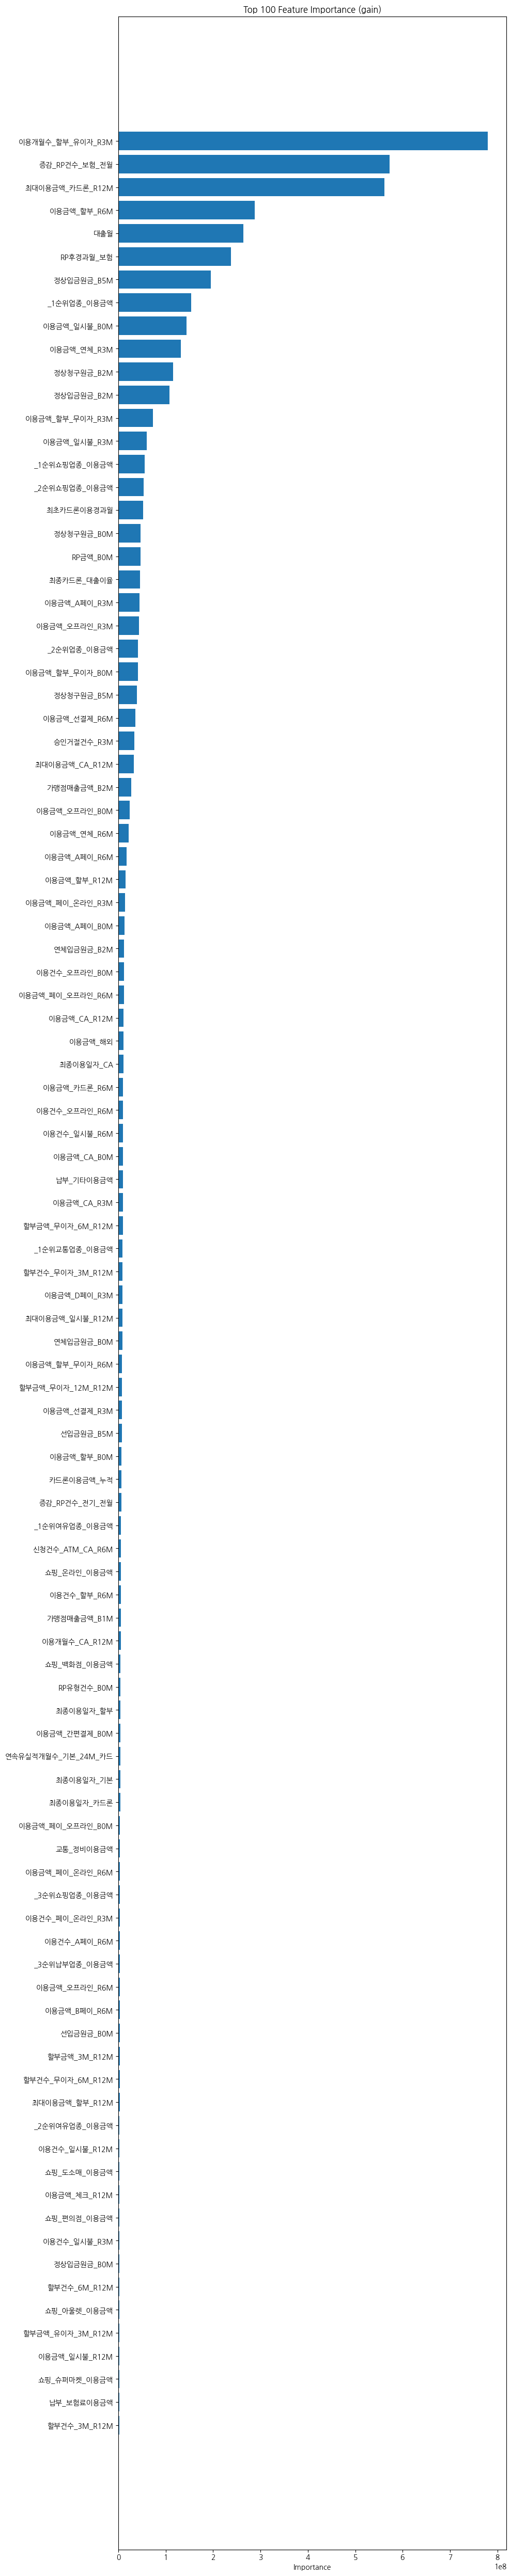

In [78]:
X = tx_df.drop(columns=['ID', 'Í∏∞Ï§ÄÎÖÑÏõî', 'Segment'])

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(tx_df['Segment'])

importance_df, model = get_feature_importance(X, y, importance_type='gain', plot_top_n=100)

ÏàúÏúÑ | Feature | ÏùòÎØ∏ | Ìï¥ÏÑù
---|---|---|---
1 | Ïù¥Ïö©Í∞úÏõîÏàò_Ìï†Î∂Ä_Ïú†Ïù¥Ïûê_R3M | ÏµúÍ∑º 3Í∞úÏõîÍ∞Ñ Ïú†Ïù¥Ïûê Ìï†Î∂ÄÎ•º Ïù¥Ïö©Ìïú Í∞úÏõî Ïàò | üìå Ïã†Ïö©ÌôúÎèô Ìå®ÌÑ¥Ïù¥ Segmentation(ÏÑ∏Í∑∏Î®ºÌä∏)Í≥º ÏßÅÏ†ë Ïó∞Í≤∞ÎêòÏñ¥ ÏûàÏùå
2 | Ï¶ùÍ∞ê_RPÍ±¥Ïàò_Î≥¥Ìóò_Ï†ÑÏõî | Î≥¥Ìóò Í¥ÄÎ†® RPÏóÖÏ¢Ö(Recurring Payment, Ï†ïÍ∏∞ Í≤∞Ï†ú)Ïùò Ï†ÑÏõî ÎåÄÎπÑ Ï¶ùÍ∞ê Í±¥Ïàò | üìå Î≥¥Ìóò Í¥ÄÎ†® ÌôúÎèôÏùò Ï¶ùÍ∞êÎèÑ Í≥†Í∞ù Îì±Í∏âÏóê ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ®
3 | ÏµúÎåÄÏù¥Ïö©Í∏àÏï°_Ïπ¥ÎìúÎ°†_R12M | ÏµúÍ∑º 1ÎÖÑÍ∞Ñ Ïπ¥ÎìúÎ°† Ïù¥Ïö© Ï§ë Í∞ÄÏû• ÌÅ∞ Í∏àÏï° | üìå Í∏àÏúµÏÉÅÌíà(ÎåÄÏ∂ú) ÌôúÏö© Í∑úÎ™®Í∞Ä Ï§ëÏöî Ïã†Ìò∏Î°ú ÏûëÏö©Ìï®
4 | Ïù¥Ïö©Í∏àÏï°_Ìï†Î∂Ä_R6M | ÏµúÍ∑º 6Í∞úÏõîÍ∞Ñ Ìï†Î∂Ä Ïù¥Ïö©Í∏àÏï° Ï¥ùÌï© | üìå Ïã†Ïö©/ÏÜåÎπÑ Í∑úÎ™®Í∞Ä segment Íµ¨Î∂ÑÏóê ÎØºÍ∞êÌïòÍ≤å Î∞òÏòÅÎê®
5 | ÎåÄÏ∂úÏõî | ÎåÄÏ∂ú Ïã§Ìñâ ÏãúÏ†êÏùò Ïõî Ï†ïÎ≥¥ | üìå ÎåÄÏ∂úÏãúÍ∏∞Í∞Ä ÏÑ∏Í∑∏Î®ºÌä∏ Íµ¨Î∂ÑÏùò ÌûåÌä∏Í∞Ä Îê® (Í≥ÑÏ†àÏÑ± ÏÜåÎπÑ, Í∏àÏúµ Ïù¥Î≤§Ìä∏ÏôÄ Í¥ÄÎ†® Í∞ÄÎä•ÏÑ±)

- Ïπ¥Îìú Ïù¥Ïö© Ìå®ÌÑ¥, Ìï†Î∂Ä/ÎåÄÏ∂ú Ïù¥Ïö© Ìå®ÌÑ¥, RPÏóÖÏ¢Ö ÌôúÎèô Í∞ôÏùÄ Í∏àÏúµ ÏÜåÎπÑ ÌñâÌÉúÍ∞Ä ÏÑ∏Í∑∏Î®ºÌä∏(Í≥†Í∞ù Í∑∏Î£π) Î∂ÑÎ•òÏóê Îß§Ïö∞ Ï§ëÏöîÌïú Ïó≠Ìï† ÏàòÌñâ
- ÏïûÏúºÎ°ú Îã§Î•∏ Ïπ¥ÌÖåÍ≥†Î¶¨ (ex. Ï≤≠Íµ¨ÏûÖÍ∏àÏ†ïÎ≥¥, ÏûîÏï°Ï†ïÎ≥¥) Ï†ÑÏ≤òÎ¶¨Ìï† ÎïåÎèÑ "ÎåÄÏ∂ú, Ìï†Î∂Ä, RPÌôúÎèô" Í¥ÄÎ†® featureÎ•º ÌäπÌûà ÏßëÏ§ëÌï¥ÏÑú Îã§Î§ÑÏïº ÌïúÎã§.
- Îã®Ïàú Í±∞Îûò Ïàò(count)Î≥¥Îã§ Í∏àÏï°, Î≥ÄÌôîÏú®(Ï¶ùÍ∞ê), ÏµúÎåÄ/ÏµúÏÜå Í∏∞Î°ù Í∞ôÏùÄ Í≤å Î™®Îç∏Ïù¥ Ìõ®Ïî¨ Ï§ëÏöîÌïòÍ≤å Î≥¥Í≥† ÏûàÎã§Îäî Ï†ê

In [79]:
def select_top_features(importance_df, X, top_percent=0.3):
    """
    Ï§ëÏöîÎèÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú ÏÉÅÏúÑ top_percent ÎπÑÏú®ÎßåÌÅº featureÎ•º ÏÑ†ÌÉùÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ÏÖã Ï∂îÏ∂ú

    Parameters:
    - importance_df (pd.DataFrame): featureÏôÄ importanceÎ•º Í∞ÄÏßÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    - X (pd.DataFrame): ÏõêÎ≥∏ feature Îç∞Ïù¥ÌÑ∞ÏÖã
    - top_percent (float): ÏÉÅÏúÑ Î™á %Î•º ÏÑ†ÌÉùÌï†ÏßÄ (Í∏∞Î≥∏ 30%)

    Returns:
    - X_top (pd.DataFrame): ÏÉÅÏúÑ featureÎßå ÏÑ†ÌÉùÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    - selected_features (list): ÏÑ†ÌÉùÎêú feature Î¶¨Ïä§Ìä∏
    """
    n_features = int(len(importance_df) * top_percent)
    selected_features = importance_df['feature'].iloc[:n_features].tolist()
    X_top = X[selected_features]
    return X_top, selected_features

In [81]:
X_top, selected_features = select_top_features(importance_df, X, top_percent=0.3)
print(f"üîπ ÏÑ†ÌÉùÎêú feature Ïàò: {len(selected_features)}")
print(f"üîπ ÏÑ†ÌÉùÎêú feature: {selected_features}")

üîπ ÏÑ†ÌÉùÎêú feature Ïàò: 108
üîπ ÏÑ†ÌÉùÎêú feature: ['Ïù¥Ïö©Í∞úÏõîÏàò_Ìï†Î∂Ä_Ïú†Ïù¥Ïûê_R3M', 'Ï¶ùÍ∞ê_RPÍ±¥Ïàò_Î≥¥Ìóò_Ï†ÑÏõî', 'ÏµúÎåÄÏù¥Ïö©Í∏àÏï°_Ïπ¥ÎìúÎ°†_R12M', 'Ïù¥Ïö©Í∏àÏï°_Ìï†Î∂Ä_R6M', 'ÎåÄÏ∂úÏõî', 'RPÌõÑÍ≤ΩÍ≥ºÏõî_Î≥¥Ìóò', 'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B5M', '_1ÏàúÏúÑÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°', 'Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_B0M', 'Ïù¥Ïö©Í∏àÏï°_Ïó∞Ï≤¥_R3M', 'Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B2M', 'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B2M', 'Ïù¥Ïö©Í∏àÏï°_Ìï†Î∂Ä_Î¨¥Ïù¥Ïûê_R3M', 'Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R3M', '_1ÏàúÏúÑÏáºÌïëÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°', '_2ÏàúÏúÑÏáºÌïëÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°', 'ÏµúÏ¥àÏπ¥ÎìúÎ°†Ïù¥Ïö©Í≤ΩÍ≥ºÏõî', 'Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B0M', 'RPÍ∏àÏï°_B0M', 'ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_ÎåÄÏ∂úÏù¥Ïú®', 'Ïù¥Ïö©Í∏àÏï°_AÌéòÏù¥_R3M', 'Ïù¥Ïö©Í∏àÏï°_Ïò§ÌîÑÎùºÏù∏_R3M', '_2ÏàúÏúÑÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°', 'Ïù¥Ïö©Í∏àÏï°_Ìï†Î∂Ä_Î¨¥Ïù¥Ïûê_B0M', 'Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B5M', 'Ïù¥Ïö©Í∏àÏï°_ÏÑ†Í≤∞Ï†ú_R6M', 'ÏäπÏù∏Í±∞Ï†àÍ±¥Ïàò_R3M', 'ÏµúÎåÄÏù¥Ïö©Í∏àÏï°_CA_R12M', 'Í∞ÄÎßπÏ†êÎß§Ï∂úÍ∏àÏï°_B2M', 'Ïù¥Ïö©Í∏àÏï°_Ïò§ÌîÑÎùºÏù∏_B0M', 'Ïù¥Ïö©Í∏àÏï°_Ïó∞Ï≤¥_R6M', 'Ïù¥Ïö©Í∏àÏï°_AÌéòÏù¥_R

In [112]:
def plot_feature_correlation(X_top, threshold=0.8):
    """
    ÏÉÅÏúÑ featureÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌñâÎ†¨ÏùÑ ÏãúÍ∞ÅÌôîÌïòÍ≥†, 
    threshold Ïù¥ÏÉÅÏù∏ featureÏåçÏùÑ Ï∂úÎ†•

    Parameters:
    - X_top (pd.DataFrame): ÏÉÅÏúÑ feature Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    - threshold (float): ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ°ú Í∞ÑÏ£ºÌï† Í∏∞Ï§Ä
    """
    # ÏàòÏπòÏπòÌòï featureÎßå ÏÑ†ÌÉù
    numeric_features = X_top.select_dtypes(include=['number'])
    corr_matrix = numeric_features.corr()
    print(" ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌñâÎ†¨ ÏÉùÏÑ± ÏôÑÎ£å..!")

    # ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ Í∑∏Î¶¨Í∏∞
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix of Top Features')
    plt.show()

    # threshold Ïù¥ÏÉÅÏù∏ feature Ïåç Ï∂úÎ†•
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

    if high_corr_pairs:
        print(f"\nÏÉÅÍ¥ÄÍ≥ÑÏàò {threshold} Ïù¥ÏÉÅÏù∏ feature Ïåç:")
        for f1, f2, corr in sorted(high_corr_pairs, key=lambda x: -abs(x[2])):
            print(f"üîπ{f1} vs {f2}: ÏÉÅÍ¥ÄÍ≥ÑÏàò = {corr:.3f}")
    else:
        print(f"\nÏÉÅÍ¥ÄÍ≥ÑÏàò {threshold} Ïù¥ÏÉÅÏù∏ feature ÏåçÏù¥ ÏóÜÏäµÎãàÎã§.")
    
    return high_corr_pairs

 ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌñâÎ†¨ ÏÉùÏÑ± ÏôÑÎ£å..!


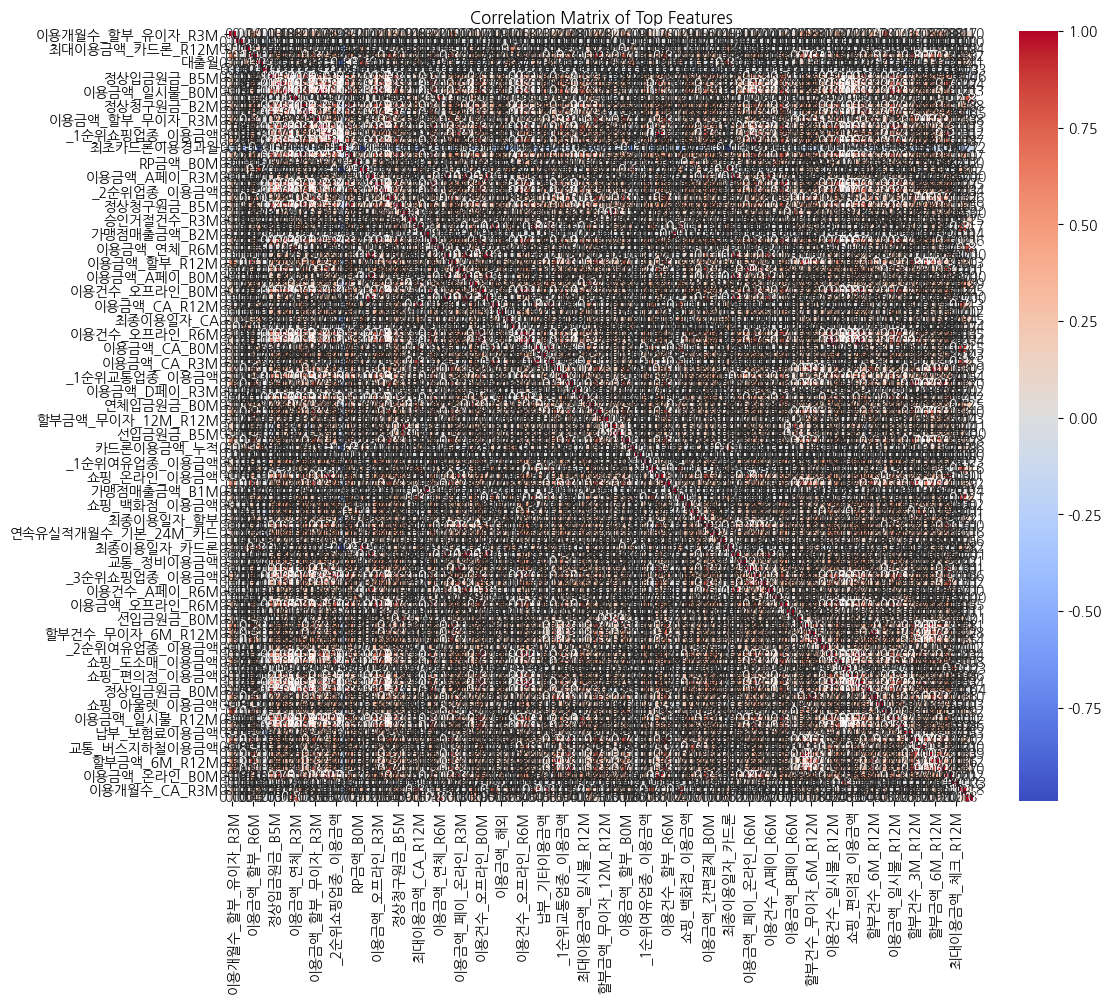


ÏÉÅÍ¥ÄÍ≥ÑÏàò 0.8 Ïù¥ÏÉÅÏù∏ feature Ïåç:
üîπÏáºÌïë_Ïò®ÎùºÏù∏_Ïù¥Ïö©Í∏àÏï° vs _1ÏàúÏúÑÏáºÌïëÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°: ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.992
üîπÏµúÏ¢ÖÏπ¥ÎìúÎ°†_ÎåÄÏ∂úÏù¥Ïú® vs ÏµúÏ¥àÏπ¥ÎìúÎ°†Ïù¥Ïö©Í≤ΩÍ≥ºÏõî: ÏÉÅÍ¥ÄÍ≥ÑÏàò = -0.991
üîπÏù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_R3M vs Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_R6M: ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.990
üîπÏù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R3M vs Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_B0M: ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.987
üîπÍ∞ÄÎßπÏ†êÎß§Ï∂úÍ∏àÏï°_B1M vs Í∞ÄÎßπÏ†êÎß§Ï∂úÍ∏àÏï°_B2M: ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.987
üîπÏù¥Ïö©Í∏àÏï°_ÌéòÏù¥_Ïò§ÌîÑÎùºÏù∏_R6M vs Ïù¥Ïö©Í∏àÏï°_AÌéòÏù¥_R6M: ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.985
üîπÏù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_R12M vs Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_R6M: ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.979
üîπÏù¥Ïö©Í∏àÏï°_ÌéòÏù¥_Ïò§ÌîÑÎùºÏù∏_B0M vs Ïù¥Ïö©Í∏àÏï°_AÌéòÏù¥_B0M: ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.971
üîπÏù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_R3M vs Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_R12M: ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.968
üîπÏù¥Ïö©Í∏àÏï°_AÌéòÏù¥_R6M vs Ïù¥Ïö©Í∏àÏï°_AÌéòÏù¥_R3M: ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.967
üîπÏù¥Ïö©Í∏àÏï°_AÌéòÏù¥_B0M vs Ïù¥Ïö©Í∏àÏï°_AÌéòÏù¥_R3M: ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.966
üîπÏù¥Ïö©Í±¥Ïàò_Ìï†Î

In [113]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò 0.8 Ïù¥ÏÉÅÏù∏ feature ÏåçÏùÑ ÏãúÍ∞ÅÌôî
high_corr_pairs = plot_feature_correlation(X_top, threshold=0.8)

In [114]:
high_corr_pairs

[('Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B2M', 'Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_B0M', np.float64(0.8064713349979258)),
 ('Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B2M', 'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B5M', np.float64(0.8630076094407318)),
 ('Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B2M', 'Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B2M', np.float64(0.852243375094208)),
 ('Ïù¥Ïö©Í∏àÏï°_Ìï†Î∂Ä_Î¨¥Ïù¥Ïûê_R3M', 'Ïù¥Ïö©Í∏àÏï°_Ìï†Î∂Ä_R6M', np.float64(0.8008111425049873)),
 ('Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R3M', 'Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_B0M', np.float64(0.9874421320151608)),
 ('Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R3M', 'Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B2M', np.float64(0.8108104455215084)),
 ('_2ÏàúÏúÑÏáºÌïëÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°', 'Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_B0M', np.float64(0.8263042900824072)),
 ('_2ÏàúÏúÑÏáºÌïëÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°', 'Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R3M', np.float64(0.8247933969424632)),
 ('ÏµúÏ¥àÏπ¥ÎìúÎ°†Ïù¥Ïö©Í≤ΩÍ≥ºÏõî', 'ÎåÄÏ∂úÏõî', np.float64(-0.8004197749818991)),
 ('Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B0M', 'Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_B0M', np.float64(0.8219721754238837)),
 ('Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B0M', 'Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B2M', np.float64(0.953567

In [ ]:
importance_list = model.feature_importance(importance_type='gain')
feature_names = model.feature_name()
importance_dict = dict(zip(feature_names, importance_list))

# importance_dict Ï†ïÎ†¨
sorted_importance = dict(sorted(importance_dict.items(), key=lambda x: x[1], reverse=True))

In [102]:
sorted_importance

{'Ïù¥Ïö©Í∞úÏõîÏàò_Ìï†Î∂Ä_Ïú†Ïù¥Ïûê_R3M': np.float64(779707008.0),
 'Ï¶ùÍ∞ê_RPÍ±¥Ïàò_Î≥¥Ìóò_Ï†ÑÏõî': np.float64(571923515.9120178),
 'ÏµúÎåÄÏù¥Ïö©Í∏àÏï°_Ïπ¥ÎìúÎ°†_R12M': np.float64(560966851.9310493),
 'Ïù¥Ïö©Í∏àÏï°_Ìï†Î∂Ä_R6M': np.float64(287749870.5742321),
 'ÎåÄÏ∂úÏõî': np.float64(264232976.91138458),
 'RPÌõÑÍ≤ΩÍ≥ºÏõî_Î≥¥Ìóò': np.float64(237577798.72506714),
 'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B5M': np.float64(194615395.41518402),
 '_1ÏàúÏúÑÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°': np.float64(154093362.13475227),
 'Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_B0M': np.float64(143918452.70097542),
 'Ïù¥Ïö©Í∏àÏï°_Ïó∞Ï≤¥_R3M': np.float64(131880638.12470245),
 'Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B2M': np.float64(115281928.00514221),
 'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B2M': np.float64(108255751.25116539),
 'Ïù¥Ïö©Í∏àÏï°_Ìï†Î∂Ä_Î¨¥Ïù¥Ïûê_R3M': np.float64(73248853.08081055),
 'Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R3M': np.float64(60370273.21474075),
 '_1ÏàúÏúÑÏáºÌïëÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°': np.float64(55778928.43270683),
 '_2ÏàúÏúÑÏáºÌïëÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°': np.float64(53626347.97408295),
 'Ïµ

In [120]:
correlated_pairs = [(f1, f2) for f1, f2, corr in high_corr_pairs if abs(corr) > 0.9]

feature_to_drops = set()

for f1, f2 in correlated_pairs:
    imp1 = sorted_importance.get(f1, 0)
    imp2 = sorted_importance.get(f2, 0)

    if imp1 > imp2:
        feature_to_drops.add(f2)
    else:
        feature_to_drops.add(f1)

feature_to_drops

{'_3ÏàúÏúÑÏáºÌïëÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°',
 'Í∞ÄÎßπÏ†êÎß§Ï∂úÍ∏àÏï°_B1M',
 'ÏáºÌïë_Ïò®ÎùºÏù∏_Ïù¥Ïö©Í∏àÏï°',
 'Ïù¥Ïö©Í∞úÏõîÏàò_CA_R3M',
 'Ïù¥Ïö©Í±¥Ïàò_AÌéòÏù¥_R6M',
 'Ïù¥Ïö©Í±¥Ïàò_Ïò§ÌîÑÎùºÏù∏_R6M',
 'Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_R12M',
 'Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_R3M',
 'Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_R6M',
 'Ïù¥Ïö©Í±¥Ïàò_Ìï†Î∂Ä_Î¨¥Ïù¥Ïûê_R12M',
 'Ïù¥Ïö©Í∏àÏï°_AÌéòÏù¥_B0M',
 'Ïù¥Ïö©Í∏àÏï°_AÌéòÏù¥_R6M',
 'Ïù¥Ïö©Í∏àÏï°_CA_R12M',
 'Ïù¥Ïö©Í∏àÏï°_CA_R3M',
 'Ïù¥Ïö©Í∏àÏï°_ÏÑ†Í≤∞Ï†ú_R3M',
 'Ïù¥Ïö©Í∏àÏï°_Ïó∞Ï≤¥_R6M',
 'Ïù¥Ïö©Í∏àÏï°_Ïò§ÌîÑÎùºÏù∏_B0M',
 'Ïù¥Ïö©Í∏àÏï°_Ïò§ÌîÑÎùºÏù∏_R6M',
 'Ïù¥Ïö©Í∏àÏï°_Ïò®ÎùºÏù∏_B0M',
 'Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R12M',
 'Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_R3M',
 'Ïù¥Ïö©Í∏àÏï°_ÌéòÏù¥_Ïò§ÌîÑÎùºÏù∏_B0M',
 'Ïù¥Ïö©Í∏àÏï°_ÌéòÏù¥_Ïò§ÌîÑÎùºÏù∏_R6M',
 'Ïù¥Ïö©Í∏àÏï°_ÌéòÏù¥_Ïò®ÎùºÏù∏_R6M',
 'Ïù¥Ïö©Í∏àÏï°_Ìï†Î∂Ä_Î¨¥Ïù¥Ïûê_R6M',
 'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B0M',
 'Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B0M',
 'Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B5M',
 'ÏµúÏ¢ÖÏù¥Ïö©ÏùºÏûê_Ïπ¥ÎìúÎ°†',
 'ÏµúÏ¢ÖÏπ¥ÎìúÎ°†_ÎåÄÏ∂úÏù¥Ïú®',
 'Ìï†Î∂ÄÍ±¥Ïàò_3M_R12M',
 'Ìï†Î∂ÄÍ±¥Ïàò_6M

In [122]:
temp_df = X_top.copy()

for col in feature_to_drops:
    X_top = X_top.drop(columns=[col])

X_top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 73 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Ïù¥Ïö©Í∞úÏõîÏàò_Ìï†Î∂Ä_Ïú†Ïù¥Ïûê_R3M    uint8 
 1   Ï¶ùÍ∞ê_RPÍ±¥Ïàò_Î≥¥Ìóò_Ï†ÑÏõî       int8  
 2   ÏµúÎåÄÏù¥Ïö©Í∏àÏï°_Ïπ¥ÎìúÎ°†_R12M     uint32
 3   Ïù¥Ïö©Í∏àÏï°_Ìï†Î∂Ä_R6M         int32 
 4   ÎåÄÏ∂úÏõî                 int32 
 5   RPÌõÑÍ≤ΩÍ≥ºÏõî_Î≥¥Ìóò           uint8 
 6   Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B5M          uint32
 7   _1ÏàúÏúÑÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°         uint32
 8   Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_B0M        int16 
 9   Ïù¥Ïö©Í∏àÏï°_Ïó∞Ï≤¥_R3M         uint16
 10  Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B2M          uint32
 11  Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B2M          uint32
 12  Ïù¥Ïö©Í∏àÏï°_Ìï†Î∂Ä_Î¨¥Ïù¥Ïûê_R3M     int16 
 13  _1ÏàúÏúÑÏáºÌïëÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°       uint32
 14  _2ÏàúÏúÑÏáºÌïëÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°       uint16
 15  ÏµúÏ¥àÏπ¥ÎìúÎ°†Ïù¥Ïö©Í≤ΩÍ≥ºÏõî          uint16
 16  RPÍ∏àÏï°_B0M            uint16
 17  Ïù¥Ïö©Í∏àÏï°_AÌéòÏù¥_R3M      

In [133]:
X_top.columns

Index(['Ïù¥Ïö©Í∞úÏõîÏàò_Ìï†Î∂Ä_Ïú†Ïù¥Ïûê_R3M', 'Ï¶ùÍ∞ê_RPÍ±¥Ïàò_Î≥¥Ìóò_Ï†ÑÏõî', 'ÏµúÎåÄÏù¥Ïö©Í∏àÏï°_Ïπ¥ÎìúÎ°†_R12M', 'Ïù¥Ïö©Í∏àÏï°_Ìï†Î∂Ä_R6M',
       'ÎåÄÏ∂úÏõî', 'RPÌõÑÍ≤ΩÍ≥ºÏõî_Î≥¥Ìóò', 'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B5M', '_1ÏàúÏúÑÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°', 'Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_B0M',
       'Ïù¥Ïö©Í∏àÏï°_Ïó∞Ï≤¥_R3M', 'Ï†ïÏÉÅÏ≤≠Íµ¨ÏõêÍ∏à_B2M', 'Ï†ïÏÉÅÏûÖÍ∏àÏõêÍ∏à_B2M', 'Ïù¥Ïö©Í∏àÏï°_Ìï†Î∂Ä_Î¨¥Ïù¥Ïûê_R3M',
       '_1ÏàúÏúÑÏáºÌïëÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°', '_2ÏàúÏúÑÏáºÌïëÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°', 'ÏµúÏ¥àÏπ¥ÎìúÎ°†Ïù¥Ïö©Í≤ΩÍ≥ºÏõî', 'RPÍ∏àÏï°_B0M',
       'Ïù¥Ïö©Í∏àÏï°_AÌéòÏù¥_R3M', 'Ïù¥Ïö©Í∏àÏï°_Ïò§ÌîÑÎùºÏù∏_R3M', '_2ÏàúÏúÑÏóÖÏ¢Ö_Ïù¥Ïö©Í∏àÏï°', 'Ïù¥Ïö©Í∏àÏï°_Ìï†Î∂Ä_Î¨¥Ïù¥Ïûê_B0M',
       'Ïù¥Ïö©Í∏àÏï°_ÏÑ†Í≤∞Ï†ú_R6M', 'ÏäπÏù∏Í±∞Ï†àÍ±¥Ïàò_R3M', 'ÏµúÎåÄÏù¥Ïö©Í∏àÏï°_CA_R12M', 'Í∞ÄÎßπÏ†êÎß§Ï∂úÍ∏àÏï°_B2M',
       'Ïù¥Ïö©Í∏àÏï°_Ìï†Î∂Ä_R12M', 'Ïù¥Ïö©Í∏àÏï°_ÌéòÏù¥_Ïò®ÎùºÏù∏_R3M', 'Ïó∞Ï≤¥ÏûÖÍ∏àÏõêÍ∏à_B2M', 'Ïù¥Ïö©Í±¥Ïàò_Ïò§ÌîÑÎùºÏù∏_B0M',
       'Ïù¥Ïö©Í∏àÏï°_Ìï¥Ïô∏', 'ÏµúÏ¢ÖÏù¥Ïö©ÏùºÏûê_CA', 'Ïù¥Ïö©Í∏àÏï°_Ïπ¥ÎìúÎ°†_R6

In [ ]:
# filtered_tx_df = tx_df[['ID', 'Í∏∞Ï§ÄÎÖÑÏõî'] + X_top.columns.tolist()]
# filtered_tx_df.to_parquet('../dataset/train/tx.parquet', index=False)

filtered_tx_test_df = tx_test_df[['ID', 'Í∏∞Ï§ÄÎÖÑÏõî'] + X_top.columns.tolist()]
filtered_tx_test_df.to_parquet('../dataset/test/tx.parquet', index=False)